### CSS-styling

In [1]:
# HTML
from IPython.core.display import HTML

def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
# print(css_styling())
css_styling()

In [104]:
%%html

<div class="myDiv">
  <div class="myDiv_header1">
    <h1>Summary</h1>
       </div>      
        <div class="myDiv_2">
        
        <p>
            SQL is one of the most important tools in data analytics and data science.
            Reasons enough to take a closer look at SQL.
            This project uses the SQLite adapter for importing database files.
            For example the Chinook, Northwind, HR, and movie databases are imported with queries.
            The data is then transformed into pandas data frames.
            Pandassql is applied for querying the data frames with SQL logic instead of 
            Pandas native subsetting.A deeper look into queries is taken with the movie database.
            Several basic queries without joins are applied. 
            This is the main focus of the project as queries are concerned.
            The query results are accompanied
            by data visualization plots. A class query is constructed to make the 
            tasks easier and the code cleaner.

        </p>
        
        <p>
           The graphic below show the relationship syntax of SQL databases.
        </p>
        
        
        </div>
</div>





<img src="images/dbschema_symbols.gif" alt="Smiley face" height="300" width="400">

# Importing packages

In [3]:
# core packages
import pandas as pd
import pandasql
from pandasql import sqldf
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# tools
import os as os
import time
import pprint
import sys
import re
import json

# databases
import sqlalchemy
import sqlite3
import psycopg2

# HTML
from IPython.core.display import HTML

In [4]:
cwd=os.getcwd()
print(cwd)

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\sql


In [5]:
%%html



<div class="myDiv">
  <h2>Database: chinook</h2>
        
        <div class="myDiv_2">
        
        <p>
        The Chinook data model represents a digital media store, 
        including tables for artists, albums, media tracks, invoices 
        and customers.
        </p>
        
        
        <h2>Database schema</h2>
        </div>
</div>

      

<img src="images/dbschema_chinook.jpg" 
alt="Smiley face" height="600" width="600">    

# Importing the data
## Database: chinook

In [6]:
conn_1 = sqlite3.connect("databasefiles/chinook/chinook.db")
conn_1

In [7]:
res = conn_1.execute("SELECT name FROM sqlite_master WHERE type='table';")

for name in res.fetchall():
    print(name[0])

albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1


In [8]:
res

In [9]:
invoices = \
pd.read_sql_query("select * from invoices;", con = conn_1)

In [10]:
print(invoices.shape)
print(invoices.info())

(412, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          412 non-null    int64  
 1   CustomerId         412 non-null    int64  
 2   InvoiceDate        412 non-null    object 
 3   BillingAddress     412 non-null    object 
 4   BillingCity        412 non-null    object 
 5   BillingState       210 non-null    object 
 6   BillingCountry     412 non-null    object 
 7   BillingPostalCode  384 non-null    object 
 8   Total              412 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB
None


### pandasql 
<p>
As an SQL enthusiast it possible to import the data with the pd.read_sql function using the Python Sqlite API connection into a dataframe and then query the dataframe with pandassql.
</p>

<p>
"pandasql allows you to query pandas DataFrames using SQL syntax. It works similarly to sqldf in R. pandasql seeks to provide a more familiar way of manipulating and cleaning data for people new to Python or pandas."<br>
<a href="https://pypi.org/project/pandasql/" target="_blank">pandasql</a> 
</p>

<p>
A tutorial for pandassql is given here:
<a href="https://python-bloggers.com/2021/01/sql-with-pandas-data-frames/" target="_blank">python-bloggers</a> 

</p>

In [11]:
query_11 = """SELECT InvoiceID, BillingAddress, Total FROM invoices"""

view_11 = sqldf(query_11, globals())

print(type(view_11))
print(view_11.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceId       412 non-null    int64  
 1   BillingAddress  412 non-null    object 
 2   Total           412 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB
None


In [12]:
view_11.head(2)

,InvoiceId,BillingAddress,Total
0,1,Theodor-Heuss-Straße 34,1.98
1,2,Ullevålsveien 14,3.96


In [13]:
total_billing=view_11.Total.sum()
total_billing

2328.5999999999995

<p>The session argument knows to values: locals and globals.</p>

In [14]:
query_22 = """SELECT CustomerId, AVG(Total) AS Average_Billing
              FROM invoices
              GROUP BY InvoiceID
              ORDER BY Average_Billing DESC"""

In [15]:
view_22 = sqldf(query_22, globals())

print(view_22.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       412 non-null    int64  
 1   Average_Billing  412 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.6 KB
None


In [16]:
view_22.head()

,CustomerId,Average_Billing
0,6,25.86
1,26,23.86
2,46,21.86
3,45,21.86
4,25,18.86


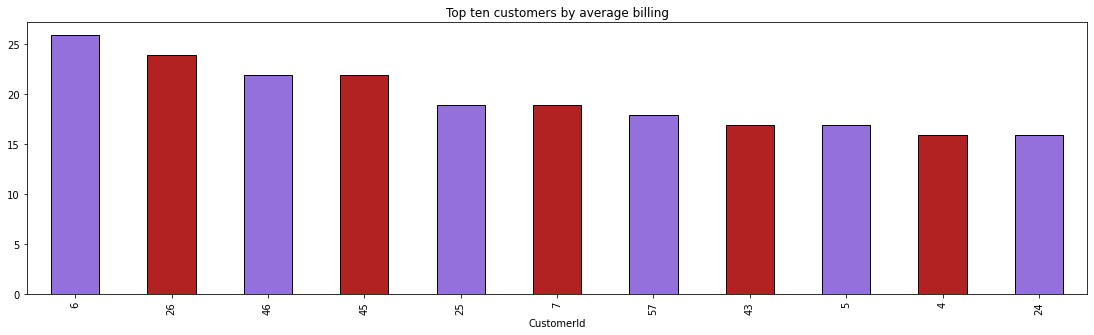

In [17]:
view_22.loc[:10,:].plot.bar(edgecolor='black', 
                            x='CustomerId', y='Average_Billing',
                            color=['mediumpurple','firebrick'],
                            figsize=(19,5),
                            title="Top ten customers by average billing",
                            legend=False)
plt.show()

<p>The function below makes querying easier by making "globals"
the static argument.</p>

In [18]:
sqlquery=lambda query: sqldf(query, globals())

#### Building a class SQLquery

<p>for writing clean code and making coding easier.</p>

In [19]:
class SQLquery():
    """Doing SQL queries on data frames"""
    def __init__(self, name, df, view=None):
        self.name = name
        self.df = df
        self.view = view
        
    def sqlquery_command(self, query):
        self.view=sqldf(query, globals())
        return self.view
    
    def n_rows(self):
        n_rows = (len(self.df))
        return n_rows
    


<p>Creating the class object.</p>

In [20]:
Invoices_object = SQLquery('invoices', invoices)
Invoices_object.name

'invoices'

In [21]:
Invoices_object.df.head(1)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98


In [22]:
Invoices_object.n_rows()

412

In [23]:
view_all_11=Invoices_object.sqlquery_command(query_22)

print(type(view_all_11))
view_all_11.head(1)

<class 'pandas.core.frame.DataFrame'>


,CustomerId,Average_Billing
0,6,25.86


### Getting information about the database

In [24]:
query_44="""SELECT BillingAddress FROM invoices
            WHERE (BillingAddress LIKE 'U%' OR 
                   BillingAddress LIKE 'T%')
                   ORDER BY BillingAddress
         """

In [25]:
view_44 = sqlquery(query_44)

print(view_44.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BillingAddress  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes
None


In [26]:
view_44.head()

,BillingAddress
0,Tauentzienstraße 8
1,Tauentzienstraße 8
2,Tauentzienstraße 8
3,Tauentzienstraße 8
4,Tauentzienstraße 8


In [27]:
view_44.value_counts()

BillingAddress         
Tauentzienstraße 8         7
Theodor-Heuss-Straße 34    7
Ullevålsveien 14           7
dtype: int64

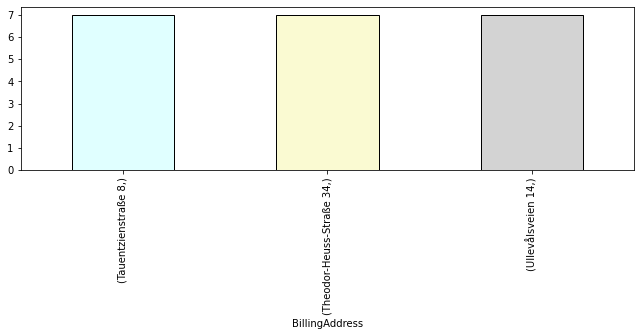

In [28]:
view_44.value_counts().plot.bar(edgecolor='black', figsize=(11,3),
                                color=["lightcyan", 
                                       "lightgoldenrodyellow", 
                                       "lightgray"])
plt.show()

In [29]:
%%html

<div class="myDiv">
  <h2>Database: classicmodels</h2>
        
        <div class="myDiv_2">
        
        <p>
        The classicmodels database is a retailer of scale models 
        of classic cars database. It contains typical business data 
        such as customers, products, sales orders, sales order line 
        items, etc.
        </p>
        
        
        <h2>Database schema</h2>
        </div>
</div>

      

<img src="images/classicmodels.png" 
alt="Smiley face" height="600" width="600">    

In [30]:
conn_44 = \
sqlite3.connect('databasefiles/company_mysql/classicmodels.sqlite')

In [31]:
res = conn_44.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

orders
offices
productlines
orderdetails
customers
products
payments
employees


###  Connecting to Database and <br>fetching the data with  Python SQLite
https://origin.geeksforgeeks.org/python-sqlite-connecting-to-database/

In [32]:
cursor_44 = conn_44.cursor()
print('DB Init')

DB Init


In [33]:
cursor_44 = conn_44.execute('select * from orders')

In [34]:
c_d = cursor_44.description
c_d[0][0]

'orderNumber'

In [35]:
order_col_names=[]

for i in range(0,7):
    print(cursor_44.description[i][0])
    order_col_names.append(cursor_44.description[i][0])

orderNumber
orderDate
requiredDate
shippedDate
status
comments
customerNumber


In [36]:
query_44 = 'Select * From orders;'
cursor_44.execute(query_44)
result_44 = cursor_44.fetchall()


In [37]:
print(type(result_44))
print(len(result_44))
print(result_44[:5])

<class 'list'>
326
[('10100', '2003-01-06', '2003-01-13', '2003-01-10', 'Shipped', '', '363'), ('10101', '2003-01-09', '2003-01-18', '2003-01-11', 'Shipped', 'Check on availability.', '128'), ('10102', '2003-01-10', '2003-01-18', '2003-01-14', 'Shipped', '', '181'), ('10103', '2003-01-29', '2003-02-07', '2003-02-02', 'Shipped', '', '121'), ('10104', '2003-01-31', '2003-02-09', '2003-02-01', 'Shipped', '', '141')]


In [38]:
df_orders=pd.DataFrame(result_44, columns=order_col_names)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   orderNumber     326 non-null    object
 1   orderDate       326 non-null    object
 2   requiredDate    326 non-null    object
 3   shippedDate     326 non-null    object
 4   status          326 non-null    object
 5   comments        326 non-null    object
 6   customerNumber  326 non-null    object
dtypes: object(7)
memory usage: 18.0+ KB


In [39]:
df_orders.dtypes

orderNumber       object
orderDate         object
requiredDate      object
shippedDate       object
status            object
comments          object
customerNumber    object
dtype: object

<p>Data types are not correct.</p>

In [40]:
df_orders.head(2)

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128


#### Getting the column names with PRAGMA<br>

In [41]:
schema_1=\
cursor_44.execute("PRAGMA table_info('orders')").fetchall()

In [42]:
schema_1

[(0, 'orderNumber', '', 0, None, 0),
 (1, 'orderDate', '', 0, None, 0),
 (2, 'requiredDate', '', 0, None, 0),
 (3, 'shippedDate', '', 0, None, 0),
 (4, 'status', '', 0, None, 0),
 (5, 'comments', '', 0, None, 0),
 (6, 'customerNumber', '', 0, None, 0)]

In [43]:
%%html


<div class="myDiv">
  <h2>Database: Northwind</h2>
        
        <div class="myDiv_2">
        
        <p>
        "The Northwind database is a sample database that was originally 
        created by Microsoft and used as the basis for their 
        tutorials in a variety of database products for decades. 
        The Northwind database contains the sales data for a 
        fictitious company called “Northwind Traders,” 
        which imports and exports specialty foods from around the world."<br>
        <a href="https://docs.yugabyte.com/latest/sample-data/northwind/" 
        target="_blank">yugabyte</a> 
        </p>
        
        
        <h2>Database schema</h2>
        </div>
</div>

<img src="images/north.png" 
alt="Smiley face" height="600" width="600">   

In [44]:
northwind_conn = \
sqlite3.connect('databasefiles/northwind/Northwind_small.sqlite')

res = \
northwind_conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic
Region
Territory
EmployeeTerritory


In [45]:
%%html

<div class="myDiv">
  <h2>Database: HR</h2>
        
        <div class="myDiv_2">
        
        <p>
        A  SQL Sample Database called HR that manages the HR data of 
        the small businesses.
        <br>
        <a href="https://www.sqltutorial.org/sql-sample-database/" 
        target="_blank">sqltutorial</a> 
        </p>
        
        
        <h2>Database schema</h2>
        </div>
</div>

<img src="images/hr.png" 
alt="Smiley face" height="600" width="600">   

In [46]:
hr_conn = sqlite3.connect('databasefiles/hr_post/sqlite.db')

res = \
hr_conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

demo
regions
sqlite_sequence
countries
locations
departments
jobs
employees
dependents


# Querying datbases
## Querying the movie_metadata database

In [47]:
%%html

<div class="myDiv">
  <h2>Database: films</h2>
        
        <div class="myDiv_2">
        
        <p>
        The movie_metadata (films) database contains information about
        people, films, reviews, roles.<br>
        The database is here used to do queries on one table without joining. 
        </p>
        
        
        </div>
</div>



### Fetching the data

In [48]:
films_conn = sqlite3.connect('databasefiles/films/movie.sqlite')
films_cursor = films_conn.cursor()

In [49]:
films_cursor.description

### Getting information about the database

<p>Which SQLite? is used?</p>

In [50]:
films_q_1 = 'select sqlite_version();'
films_cursor.execute(films_q_1).fetchall()

[('3.36.0',)]

<p>Which tables are there?</p>

In [51]:
films_tables = \
films_cursor.execute("SELECT name FROM sqlite_master \
                      WHERE type='table';")

for table in films_tables.fetchall():
    print(table[0])

movie_metadata


#### Getting the schema by applying PRAGMA.
<p>
which is the first thing to do, when quering databases.<br>
Answering what is in there?</p>

In [52]:
films_schema=\
films_cursor.execute("PRAGMA schema").fetchall()

films_schema

[]

In [53]:
films_people_schema=\
films_conn.execute("PRAGMA table_info('movie_metadata')").fetchall()

films_people_schema

[(0, 'color', '', 0, None, 0),
 (1, 'director_name', '', 0, None, 0),
 (2, 'num_critic_for_reviews', '', 0, None, 0),
 (3, 'duration', '', 0, None, 0),
 (4, 'director_facebook_likes', '', 0, None, 0),
 (5, 'actor_3_facebook_likes', '', 0, None, 0),
 (6, 'actor_2_name', '', 0, None, 0),
 (7, 'actor_1_facebook_likes', '', 0, None, 0),
 (8, 'gross', '', 0, None, 0),
 (9, 'genres', '', 0, None, 0),
 (10, 'actor_1_name', '', 0, None, 0),
 (11, 'movie_title', '', 0, None, 0),
 (12, 'num_voted_users', '', 0, None, 0),
 (13, 'cast_total_facebook_likes', '', 0, None, 0),
 (14, 'actor_3_name', '', 0, None, 0),
 (15, 'facenumber_in_poster', '', 0, None, 0),
 (16, 'plot_keywords', '', 0, None, 0),
 (17, 'movie_imdb_link', '', 0, None, 0),
 (18, 'num_user_for_reviews', '', 0, None, 0),
 (19, 'language', '', 0, None, 0),
 (20, 'country', '', 0, None, 0),
 (21, 'content_rating', '', 0, None, 0),
 (22, 'budget', '', 0, None, 0),
 (23, 'title_year', '', 0, None, 0),
 (24, 'actor_2_facebook_likes', '', 

#### Datatypes in SQLite

<p>Info about the data types are not provided here<br>
and not shown in the data.</p>

<p>The col title_year is of type STR.<br>
It should be of type INT.<br>
Col types are immutable in SQLite.<br>
There is not a direct way to change the datatype of a VAR.</p>

<p>Alternatively</p>

In [54]:
films_q_sqlite_master=\
"SELECT sql FROM sqlite_master WHERE name='movie_metadata'"

films_people_schema=\
films_conn.execute(films_q_sqlite_master).fetchall()

print(type(films_people_schema))
print(type(films_people_schema[0]))
films_people_schema[0]

<class 'list'>
<class 'tuple'>


('CREATE TABLE `movie_metadata` (`color`, `director_name`, `num_critic_for_reviews`, `duration`, `director_facebook_likes`, `actor_3_facebook_likes`, `actor_2_name`, `actor_1_facebook_likes`, `gross`, `genres`, `actor_1_name`, `movie_title`, `num_voted_users`, `cast_total_facebook_likes`, `actor_3_name`, `facenumber_in_poster`, `plot_keywords`, `movie_imdb_link`, `num_user_for_reviews`, `language`, `country`, `content_rating`, `budget`, `title_year`, `actor_2_facebook_likes`, `imdb_score`, `aspect_ratio`, `movie_facebook_likes`, column_name INTEGER)',)

### Conducting queries

#### SELECT all

In [55]:
films_q_2 = 'SELECT * FROM movie_metadata '
films_data = films_cursor.execute(films_q_2).fetchall()
films_data[:1]

[('Color',
  'James Cameron',
  '723',
  '178',
  '0',
  '855',
  'Joel David Moore',
  '1000',
  '760505847',
  'Action|Adventure|Fantasy|Sci-Fi',
  'CCH Pounder',
  'Avatar\xa0',
  '886204',
  '4834',
  'Wes Studi',
  '0',
  'avatar|future|marine|native|paraplegic',
  'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1',
  '3054',
  'English',
  'USA',
  'PG-13',
  '237000000',
  '2009',
  '936',
  '7.9',
  '1.78',
  '33000',
  None)]

In [56]:
print(type(films_data))
print(type(films_data[0]))
print(films_data[0])

<class 'list'>
<class 'tuple'>
('Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000', None)


#### Selecting

In [57]:
films_q_singlecol = 'select director_name from movie_metadata'
directors=films_cursor.execute(films_q_singlecol).fetchall()
directors[:5]

[('James Cameron',),
 ('Gore Verbinski',),
 ('Sam Mendes',),
 ('Christopher Nolan',),
 ('Doug Walker',)]

In [58]:
films_q_multicols = \
'select director_name, director_facebook_likes from movie_metadata'
directors_likes=films_cursor.execute(films_q_multicols ).fetchall()
directors_likes[:5]

[('James Cameron', '0'),
 ('Gore Verbinski', '563'),
 ('Sam Mendes', '0'),
 ('Christopher Nolan', '22000'),
 ('Doug Walker', '131')]

#### Distinct

In [59]:
films_q_distinct_actors = \
'select distinct(actor_2_name) from movie_metadata'
distinct_actors=films_cursor.execute(films_q_distinct_actors).fetchall()
distinct_actors[:5]

[('Joel David Moore',),
 ('Orlando Bloom',),
 ('Rory Kinnear',),
 ('Christian Bale',),
 ('Rob Walker',)]

In [60]:
films_q_count = \
'select COUNT(*) from movie_metadata'
count_all=films_cursor.execute(films_q_count).fetchall()
count_all[:5]

[(5043,)]

#### Filtering with "WHERE"

In [61]:
films_q_italy = \
'select director_name, country from movie_metadata \
 where country == "Italy"'
italy=films_cursor.execute(films_q_italy).fetchall()
italy[:5]

[('David Leland', 'Italy'),
 ('Sergio Leone', 'Italy'),
 ('Liliana Cavani', 'Italy'),
 ('Giuseppe Tornatore', 'Italy'),
 ('Sergey Bondarchuk', 'Italy')]

In [62]:
films_q_budget = \
"select movie_title, budget  from movie_metadata \
where budget> 10000000"
budget=films_cursor.execute(films_q_budget).fetchall()
budget[:5]

[('Avatar\xa0', '237000000'),
 ("Pirates of the Caribbean: At World's End\xa0", '300000000'),
 ('Spectre\xa0', '245000000'),
 ('The Dark Knight Rises\xa0', '250000000'),
 ('Star Wars: Episode VII - The Force Awakens\xa0            ', '')]

#### Filtering with WHERE using DISTINCT before

In [63]:
films_q_eigthies = \
"select distinct(title_year) from movie_metadata"
eigthies=films_cursor.execute(films_q_eigthies).fetchall()
eigthies[:4]

[('2009',), ('2007',), ('2015',), ('2012',)]

In [64]:
films_q_5509 = \
"select movie_title, title_year from movie_metadata \
where (title_year = '1955') or (title_year = '2009') order by title_year"
q_5509=films_cursor.execute(films_q_5509).fetchall()
q_5509[:5]

[('The Trouble with Harry\xa0', '1955'),
 ('Ordet\xa0', '1955'),
 ('Avatar\xa0', '2009'),
 ('Harry Potter and the Half-Blood Prince\xa0', '2009'),
 ('Transformers: Revenge of the Fallen\xa0', '2009')]

In [65]:
films_1_num_critic =\
"SELECT director_name, COUNT(num_critic_for_reviews) AS n_reviews from movie_metadata \
 GROUP BY(director_name) ORDER BY n_reviews DESC LIMIT 11"

num_critic_view = films_cursor.execute(films_1_num_critic).fetchall()
num_critic_view

[('', 104),
 ('Steven Spielberg', 26),
 ('Woody Allen', 22),
 ('Martin Scorsese', 20),
 ('Clint Eastwood', 20),
 ('Ridley Scott', 17),
 ('Tim Burton', 16),
 ('Steven Soderbergh', 16),
 ('Spike Lee', 16),
 ('Renny Harlin', 15),
 ('Oliver Stone', 14)]

In [66]:
director_null = "SELECT COUNT(director_name) AS n_missing_directors \
                 FROM movie_metadata \
                 WHERE director_name LIKE ''"

films_cursor.execute(director_null).fetchall()

[(104,)]

### Getting information about the database

### Building dataframes from SQL imports
<p>
Creating dataframes from the data fetched with Sqlite by<br>
turning the tuple into a df and then below using pd.read_sql.
</p>

#### SELECT all

In [67]:
films_q_2 = 'SELECT * FROM movie_metadata '
films_data = films_cursor.execute(films_q_2).fetchall()
films_data[:1]

[('Color',
  'James Cameron',
  '723',
  '178',
  '0',
  '855',
  'Joel David Moore',
  '1000',
  '760505847',
  'Action|Adventure|Fantasy|Sci-Fi',
  'CCH Pounder',
  'Avatar\xa0',
  '886204',
  '4834',
  'Wes Studi',
  '0',
  'avatar|future|marine|native|paraplegic',
  'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1',
  '3054',
  'English',
  'USA',
  'PG-13',
  '237000000',
  '2009',
  '936',
  '7.9',
  '1.78',
  '33000',
  None)]

In [68]:
print(type(films_data))
print(type(films_data[0]))
print(films_data[0])

<class 'list'>
<class 'tuple'>
('Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000', None)


In [69]:
movie_col_names=[]


for i in range(0,28):
    print(films_cursor.description[i][0])
    movie_col_names.append(films_cursor.description[i][0])

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [70]:
print(len(movie_col_names))

28


In [71]:
movies_df_1=\
pd.DataFrame(films_data).drop(28, axis=1)

movies_df_1.columns = movie_col_names


movies_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   color                      5043 non-null   object
 1   director_name              5043 non-null   object
 2   num_critic_for_reviews     5043 non-null   object
 3   duration                   5043 non-null   object
 4   director_facebook_likes    5043 non-null   object
 5   actor_3_facebook_likes     5043 non-null   object
 6   actor_2_name               5043 non-null   object
 7   actor_1_facebook_likes     5043 non-null   object
 8   gross                      5043 non-null   object
 9   genres                     5043 non-null   object
 10  actor_1_name               5043 non-null   object
 11  movie_title                5043 non-null   object
 12  num_voted_users            5043 non-null   object
 13  cast_total_facebook_likes  5043 non-null   object
 14  actor_3_

In [72]:
movies_df_1.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0


#### pd.read_sql

In [73]:
movies_df_2=pd.read_sql(films_q_2 , con=films_conn )
movies_df_2.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,column_name
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,None
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,None
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,None
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,None
4,,Doug Walker,,,131,,Rob Walker,131,,Documentary,...,,,,,,12,7.1,,0,None
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,None
6,Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,...,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,None
7,Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000,2010,553,7.8,1.85,29000,None
8,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,None
9,Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,None


#### Data cleaning

In [74]:
movies_df_3 = movies_df_2.copy()
movies_df_3.replace("Color", '0', inplace=True)
movies_df_3.replace("", '0', inplace=True)
movies_df_3.fillna('0', inplace=True)
# movies_df_3.replace(to_replace=' ', value="0", inplace=True)


In [75]:
movies_subset=\
movies_df_3.iloc[:,np.r_[3:6, 7:9, 12:14, 15, 18, 22:27]]

print(movies_subset.shape)

(5043, 14)


In [76]:
movie_cols=\
movies_df_3.iloc[:, [2,3,4,5,6,7,8, 12,13,14,15,18,22,23,24,25,26,27]].\
columns.tolist()

In [77]:
movies_df_3[movie_cols]=\
movies_df_3[movie_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [78]:
movies_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              5043 non-null   object 
 2   num_critic_for_reviews     5043 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    5043 non-null   float64
 5   actor_3_facebook_likes     5043 non-null   float64
 6   actor_2_name               13 non-null     float64
 7   actor_1_facebook_likes     5043 non-null   float64
 8   gross                      5043 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5043 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   float64
 13  cast_total_facebook_likes  5043 non-null   float

In [79]:
# print(movies_df_3.iloc[:,np.r_[3:6, 7:9, 12:14, 15, 18, 22:27]].info())
print(movies_df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              5043 non-null   object 
 2   num_critic_for_reviews     5043 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    5043 non-null   float64
 5   actor_3_facebook_likes     5043 non-null   float64
 6   actor_2_name               13 non-null     float64
 7   actor_1_facebook_likes     5043 non-null   float64
 8   gross                      5043 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5043 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   float64
 13  cast_total_facebook_likes  5043 non-null   float

#### Querying data frames with pandas_sql

In [80]:
movies_obj = SQLquery('movies', movies_df_3)

movies_df_obj=movies_obj.df

print(movies_obj.name)
print(type(movies_obj.df))
print(type(movies_df_obj))

movies
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [81]:
mov_greater="""select * from movies_df_3 where duration >= 200"""

In [82]:
mov_1=movies_obj.sqlquery_command(mov_greater)

print(type(mov_1))
mov_1.head(1)

<class 'pandas.core.frame.DataFrame'>


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,column_name
0,0,Peter Jackson,446.0,201.0,0.0,84.0,None,6000.0,218051260.0,Action|Adventure|Drama|Romance,...,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0.0,0


In [83]:
mov_count="""select Count(*) from mov_1"""
movies_obj.sqlquery_command(mov_count)

,Count(*)
0,37


In [84]:
mov_between_1 =\
"""select director_name, num_critic_for_reviews from movies_df_obj
   where num_critic_for_reviews between 500 and 600 ORDER BY
   num_critic_for_reviews DESC"""

mov_between_1_df = movies_obj.sqlquery_command(mov_between_1)

print(mov_between_1_df.shape)
print(mov_between_1_df.info())
mov_between_1_df.head(10)

(53, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           53 non-null     object 
 1   num_critic_for_reviews  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes
None


,director_name,num_critic_for_reviews
0,Marc Webb,599.0
1,Steve McQueen,597.0
2,Quentin Tarantino,596.0
3,J.J. Abrams,590.0
4,Rian Johnson,589.0
5,Alejandro G. Iñárritu,588.0
6,Doug Liman,585.0
7,Terrence Malick,584.0
8,Tim Miller,579.0
9,Anthony Russo,576.0


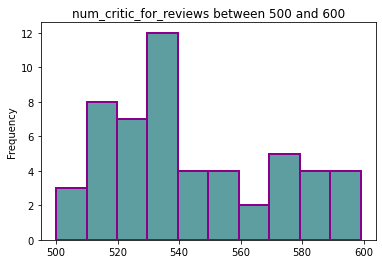

In [85]:
mov_between_1_df.plot.hist(color='cadetblue', edgecolor='darkmagenta', 
                           linewidth=2,
                           legend=False,
                           title='num_critic_for_reviews between 500 and 600')
plt.show()

In [86]:
mov_in = "select movie_title, title_year, budget \
          from movies_df_obj WHERE title_year in (2001, 2002, 2003) \
          and budget >= 30000000 ORDER BY budget DESC LIMIT 10"

mov_in = movies_obj.sqlquery_command(mov_in)

print(mov_in.info())
mov_in.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  10 non-null     object 
 1   title_year   10 non-null     float64
 2   budget       10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes
None


,movie_title,title_year,budget
0,The Legend of Suriyothai,2001.0,400000000.0
1,Terminator 3: Rise of the Machines,2003.0,200000000.0
2,Winged Migration,2001.0,160000000.0
3,The Matrix Revolutions,2003.0,150000000.0
4,The Matrix Reloaded,2003.0,150000000.0


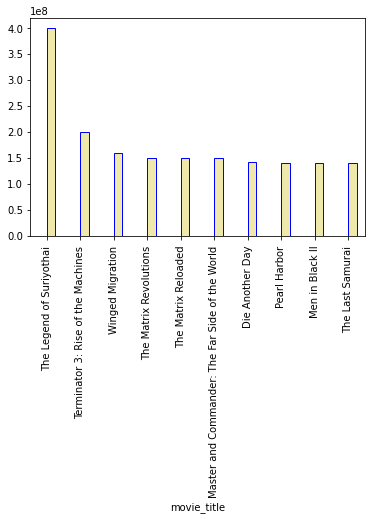

In [87]:
mov_in.plot.bar(x='movie_title',
                edgecolor='blue', color='palegoldenrod',
                legend=False)
plt.show()

In [88]:
mov_null = """select language, count(*) AS "no_language" from movies_df_3 where language  is null"""
mov_null=movies_obj.sqlquery_command(mov_null )
mov_null

,language,no_language
0,None,0


In [89]:
mov_sum = "select sum(budget) as 'total_budget' \
           from movies_df_obj"

mov_sum_buget = movies_obj.sqlquery_command(mov_sum)

print(mov_sum_buget)

   total_budget
0  1.809142e+11


In [90]:
mov_country_budget = "select country, sum(budget) as 'sum_budget' \
                      from movies_df_obj \
                      group by country \
                      having sum_budget  > 100000000 \
                      Order by sum_budget desc"

mov_country_budget_view = movies_obj.sqlquery_command(mov_country_budget)

print(mov_country_budget_view)

           country    sum_budget
0              USA  1.254678e+11
1      South Korea  1.660752e+10
2               UK  1.048544e+10
3            Japan  7.011920e+09
4           France  3.987364e+09
5          Germany  3.005010e+09
6          Hungary  2.520000e+09
7            India  1.861494e+09
8           Canada  1.613032e+09
9        Australia  1.558606e+09
10           China  1.431037e+09
11           Spain  1.156050e+09
12     New Zealand  1.059850e+09
13        Thailand  9.090000e+08
14       Hong Kong  3.731000e+08
15           Italy  2.613500e+08
16          Russia  1.727000e+08
17          Norway  1.671000e+08
18  Czech Republic  1.464500e+08
19    South Africa  1.260000e+08
20         Denmark  1.253000e+08


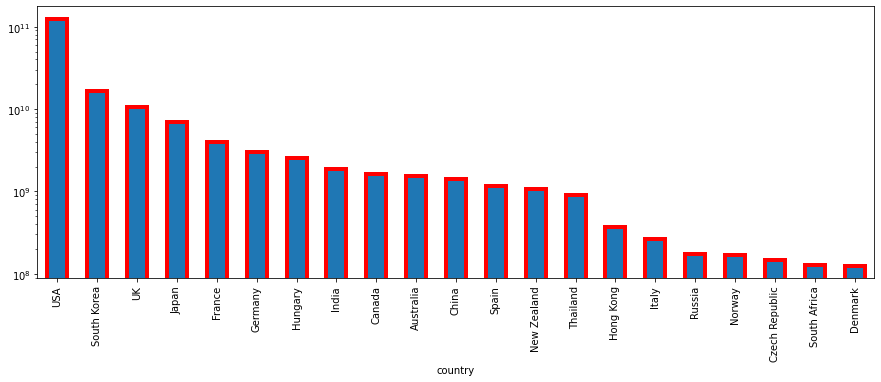

In [91]:
mov_country_budget_view.plot.bar(x='country', figsize=(15,5), legend=False,
                                 logy=True,
                                 edgecolor='red', linewidth=4)
plt.show()

In [92]:
mov_profit = "select movie_title, gross - budget as profit \
              from movies_df_obj order by profit desc limit 10"

mov_profit_view = movies_obj.sqlquery_command(mov_profit)

print(mov_profit_view)

                                  movie_title       profit
0                                     Avatar   523505847.0
1                             Jurassic World   502177271.0
2                                    Titanic   458672302.0
3         Star Wars: Episode IV - A New Hope   449935665.0
4                 E.T. the Extra-Terrestrial   424449459.0
5                               The Avengers   403279547.0
6                               The Avengers   403279547.0
7                              The Lion King   377783777.0
8  Star Wars: Episode I - The Phantom Menace   359544677.0
9                            The Dark Knight   348316061.0


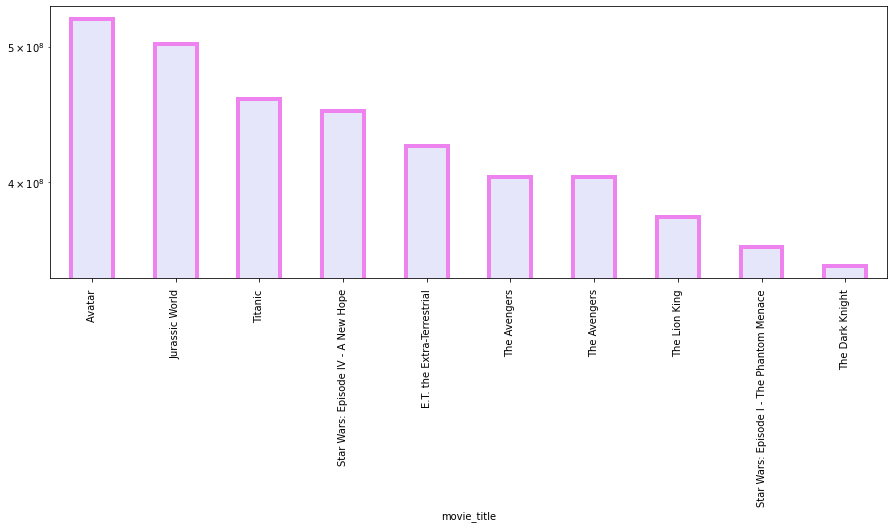

In [93]:
mov_profit_view.plot.bar(x='movie_title', figsize=(15,5), legend=False,
                                 logy=True, color='lavender',
                                 edgecolor='violet', linewidth=4)
plt.show()

<p>How many genres are there?</p>

In [94]:
mov_genres_distinct = "select count(distinct(genres)) \
                       from movies_df_obj"


mov_genres_distinct_view = movies_obj.sqlquery_command(mov_genres_distinct)

print(mov_genres_distinct_view)

   count(distinct(genres))
0                      914


In [95]:
mov_genres = "select genres, sum(gross - budget) as profit_or_loss \
              from movies_df_obj \
              group by genres order by profit_or_loss desc Limit 5 "

mov_genres_view = movies_obj.sqlquery_command(mov_genres)

print(mov_genres_view)

                            genres  profit_or_loss
0                           Comedy    3.410157e+09
1                   Comedy|Romance    2.529578e+09
2  Action|Adventure|Fantasy|Sci-Fi    2.394717e+09
3          Action|Adventure|Sci-Fi    2.152709e+09
4             Comedy|Drama|Romance    1.611889e+09


In [96]:
mov_genres_index=mov_genres_view.genres.tolist()

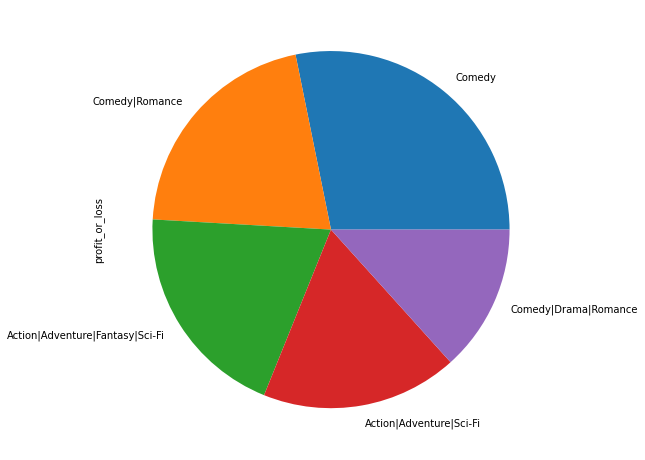

In [97]:
mov_genres_view.set_index('genres').plot.pie(y='profit_or_loss',figsize=(8,10), 
                                             legend=False)
plt.show()

<p><b>Calculating percent budget.</b></p>

In [98]:
mov_budget_percent = \
"select movie_title, budget,\
 (budget / (select sum(budget) from movies_df_obj)) * 100 as percent \
 from movies_df_obj \
"

mov_budget_percent_view = movies_obj.sqlquery_command(mov_budget_percent)

mov_budget_percent_view.head()

,movie_title,budget,percent
0,Avatar,237000000.0,0.131001
1,Pirates of the Caribbean: At World's End,300000000.0,0.165824
2,Spectre,245000000.0,0.135423
3,The Dark Knight Rises,250000000.0,0.138187
4,Star Wars: Episode VII - The Force Awakens ...,0.0,0.000000


<p>Checking</p>

In [99]:
print(mov_budget_percent_view.iloc[0,1])
print(mov_budget_percent_view.budget.sum())

print(f'Percentage of Avatar on total budget sum:\
      {mov_budget_percent_view.iloc[0,1] / mov_budget_percent_view.budget.sum()}%')

237000000.0
180914175606.0
Percentage of Avatar on total budget sum:      0.00131001343154085%


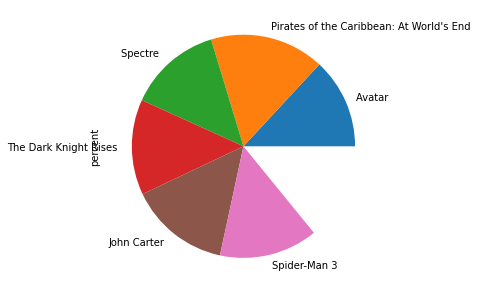

In [100]:
mov_budget_percent_view.set_index('movie_title').head(7).\
plot.pie(y='percent',figsize=(5,8), normalize=False,
                                             legend=False)
plt.show()

In [101]:
mov_gross = \
"select actor_1_name, num_critic_for_reviews, avg(gross) as average_gross\
 from movies_df_obj \
 where num_critic_for_reviews > 10 \
 group by actor_1_name \
 having avg(gross) \
 order by avg(gross) desc \
 limit 10"

mov_gross_view = movies_obj.sqlquery_command(mov_gross)

mov_gross_view

,actor_1_name,num_critic_for_reviews,average_gross
0,Rupert Everett,205.0,4.364710e+08
1,Wayne Knight,308.0,3.567840e+08
2,Steve Bastoni,275.0,2.814925e+08
3,Phaldut Sharma,738.0,2.740850e+08
4,Kathleen Freeman,212.0,2.676520e+08
5,Glenn Morshower,366.0,2.618489e+08
6,Catherine Dyer,261.0,2.559504e+08
7,John Ratzenberger,421.0,2.536131e+08
8,Tim Holmes,525.0,2.349031e+08
9,Robert Pattinson,329.0,2.301871e+08
